# Linear Regression
#### in simple linear regression there is 1 dependent variable(y or label) and 1 independent variable(X,Feature)

## Assumptions of Linear Regression

#### 1. there is a linear relation between x and y

#### 2. Errors terms or residuals are normally distributed.

#### 3. Error terms or residuals are independent of each other 

#### 4. error terms have constant variance


In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the CSV File
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
# Here finding the shape of dataset which is(Row,Column) format.
df.shape

(200, 4)

In [4]:
#check the Dtype and null values of every column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
#to know some basic statistical details.
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
#Checking the missing values in datasets
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Visualising the Data

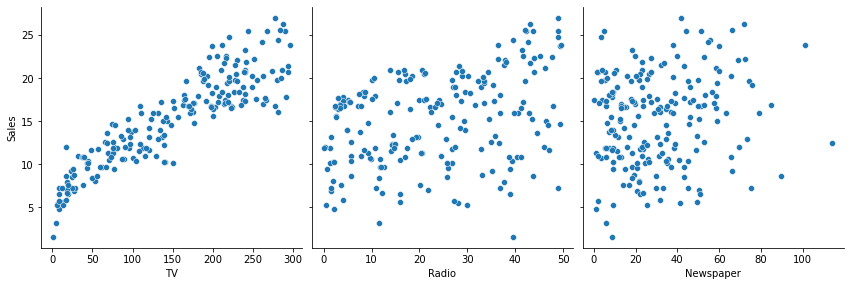

In [7]:
# Visualizing the column of TV,Radio, Newspaper at X-Axis and column Sales at Y-axis.
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=df,size=4, aspect=1)

In [8]:
#find the pairwise correlation of all columns in the dataframe.
x=df.corr()
x

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot:>

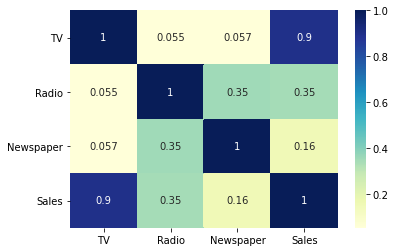

In [9]:
# to know the heatmap with annot(i.e. with the value)
sns.heatmap(x,annot=True,cmap="YlGnBu")

<AxesSubplot:xlabel='TV', ylabel='Sales'>

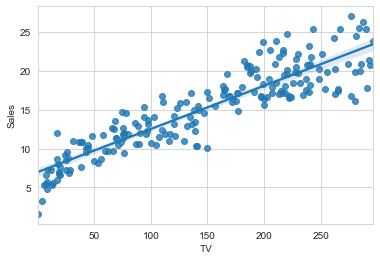

In [10]:
sns.set_style('whitegrid')
#Plot the data and find a model's best fit line in linear Regression for TV and Sales.
sns.regplot(x='TV',y='Sales',data=df)

In [11]:
#all the data points hugging the regression line very closely.
#relation between TV and Sales is found to be positive.

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

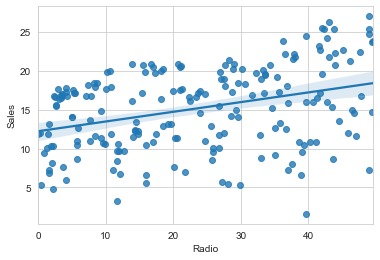

In [12]:
sns.regplot(x='Radio',y='Sales',data=df)

In [13]:
#the data points are not close to regression line they are scattered towords the Y axis and slope is also lesser
##relation between Radio and Sales is found to be not smooth as compared to TV 

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

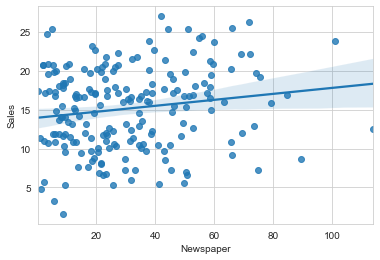

In [14]:
sns.regplot(x='Newspaper',y='Sales',data=df)

In [15]:
#it seems to be there is a negative or very less correaltion between newspaper and 
#sales beacuse the data points are more scattered towords y-axis.

### As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

### In simple linear regression there is one dependent variable and 1 independent variable

In [16]:
# here X is independent variable and y is dependent variable.
X=df['TV']
y=df['Sales']

In [17]:
#sklearn is the package that comes with sckit-learn library 
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [19]:
X_train.shape

(140,)

In [62]:
type(X_train)

pandas.core.series.Series

In [20]:
X_test.shape

(60,)

In [21]:
y_train.shape

(140,)

In [22]:
y_test.shape

(60,)

In [66]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [65]:
X_test.head()

126      7.8
104    238.2
99     135.2
92     217.7
111    241.7
Name: TV, dtype: float64

In [25]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [26]:
y_test.head()

126     6.6
104    20.7
99     17.2
92     19.4
111    21.8
Name: Sales, dtype: float64

In [27]:
#resahpe the X_train and X_test
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [28]:
X_train.shape

(140, 1)

In [29]:
X_test.shape

(60, 1)

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm = LinearRegression()

In [32]:
model=lm.fit(X_train,y_train)
model

LinearRegression()

In [33]:
#print the coefficients
lm.coef_

array([0.05454575])

In [34]:
#this is coefficient of TV i.e m or B1
#B1 > 0 i.e B1 is positive
#if Bi>0 then increase in X, there will increase in y
#if Bi<0 then increase in X, there will decrease in y

In [68]:
#.intercept_ is a one-dimensional array with the single element b₀, and .coef_ is a two-dimensional 
#array with the single element b₁.
lm.intercept_ 

6.948683200001357

In [36]:
y=0.05454575 * X_train + 6.948683200001357

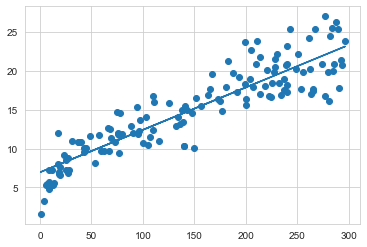

In [37]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.05454575 * X_train + 6.948683200001357)

In [38]:
y_train_pred =lm.predict(X_train)
y_test_pred =lm.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [40]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.8157933136480389
0.7921031601245662


In [41]:
print(mean_absolute_error(y_train,y_train_pred))
print(mean_absolute_error(y_test,y_test_pred))

1.9167796095132974
1.6480589869746527


In [42]:
print(mean_squared_error(y_train,y_train_pred))
print(mean_squared_error(y_test,y_test_pred))

5.752400386486836
4.077556371826949


In [43]:
# RMSE
print(np.sqrt(mean_squared_error(y_train,y_train_pred)))
print(np.sqrt(mean_squared_error(y_test,y_test_pred)))

2.3984162246129914
2.019296008966231


In [44]:
df['Sales'].mean()

15.130500000000005

In [45]:
residual= y_train- y_train_pred

In [46]:
residual.head()

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

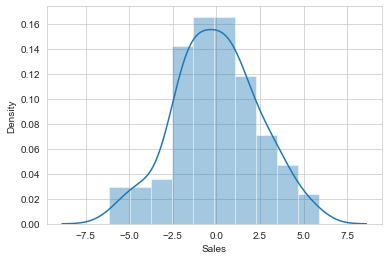

In [47]:
sns.distplot(residual)

In [48]:
#The residuals are normally distributed with a mean 0. All good!
#so fundamental assumption of linear regression is repected in this case.

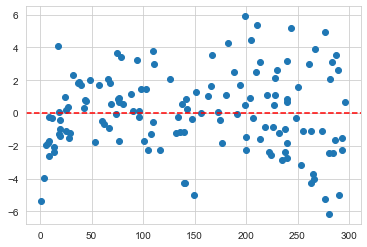

In [49]:
#Looking for patterns in the residuals
plt.scatter(X_train,residual)
plt.axhline(y=0,color='r',ls='--')
plt.show()

In [50]:
#there is no significant pattern as all the residual are scattered around y=0 i.e.mean of residuals is zero.
#so the model is good enough .

In [51]:
#for test data
test_residual=y_test-y_test_pred
test_residual.head()

126   -0.774140
104    0.758518
99     2.876731
92     0.576706
111    1.667608
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Density'>

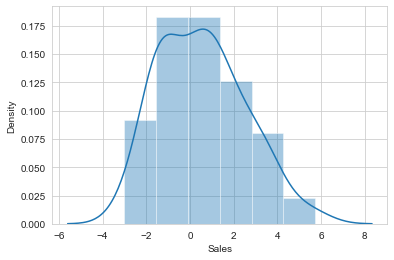

In [52]:
sns.distplot(test_residual)

# method 2

In [53]:
#method 2
#Statsmodel
#y=mx+c  #linear regression
#y=mx  #statsmodel dont consider the constant (intercept)
# we have to manually add the constant
import statsmodels.api as sm
import numpy as np
#import statsmodels.formula.api as smf

In [54]:
X=df['TV']
y=df['Sales']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [56]:
X_train_sm = sm.add_constant(X_train)
X_train_sm

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3
...,...,...
87,1.0,110.7
103,1.0,187.9
67,1.0,139.3
24,1.0,62.3


In [57]:
lr = sm.OLS(X_train_sm, y_train).fit()

In [58]:
lr.params

,0,1
Sales,0.058525,10.466345


In [59]:
#y(Sales) = 6.94 + 0.05*TV(X)
#if we increase a unit value i.e 1 in X ,then the increase in y should be m i.e.0.05 units